# Air Pollution Dimensionality Reduction (PCA and t-SNE)

-----------------------------
## **Context**
-----------------------------

Air pollution can be measured by the amount of particle existence in the atmosphere. The objective of this excercise is to see if we can effectively use PCA and t-SNE to perform dimensionality reduction on the dataset.

Dimensionality reduction is helpful because it is generally difficult to analyze or visualize high-dimensional data and identify hidden patterns. Also, not all features of the data are equally important

PCA approach is a linear combination features which explains the most variance see in the underlying data.

T-SNE clusters data points in a non-linear method. It uses a probabilistic approach to transform the data from high dimension to low dimension so that the 'similarity' in the data is preserved

-----------------------------
## **Dataset** 
-----------------------------
- This dataset contains **13 months of data on major pollutants and meteorological levels of a city**.

- The data shows average readings for Nitric Oxide(NO), Nitrogen Dioxide(NO2), Oxides of Nitrogen, Ozone, Particulate Matter (PM10 and PM2.5), Sulphur Dioxide, Benzene, Toulene, and P_Xylene. Measured in Micrograms per Cubic Meter of Air (ug/m3). Also shows few generic features WindSpeed, VerticalWindSpeed, BarPressure, Weather,Temp, and WindDirection.

- The PD denotes the Previous Day. In this dataset, we have 5 columns that are Previous Date values of correponsing columns in the dataset. They are PD_PM10, PD_NO2, PD_SO2, PD_CO, PD_PM2.5.

- The **Date** is the feature at which the data was recorded.

## Step 1 - Import Libraries

In [33]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

# Importing PCA and t-SNE
from sklearn.decomposition import PCA

from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings("ignore")

In [4]:
# read the data
data = pd.read_csv("/Users/guransingh/Library/CloudStorage/OneDrive-Personal/Documents/Work/Python Notebooks/Python Notebooks/MIT/AirPollution_DimensionalityReduction/AirPollution.csv")

In [5]:
data.head(2)

,SrNo,Date,NO,CO,NO2,O3,SO2,PM2.5,Benzene,Toulene,...,WindSpeed,VerticalWindSpeed,Solar,BarPressure,Weather,PD_PM2.5,PD_PM10,PD_NO2,PD_SO2,PD_CO
0,1,04-04-2015,7.22,1.77,47.94,51.07,16.88,48.99,2.53,9.65,...,1.22,0.08,162.18,732.25,Summer,NaN,NaN,NaN,NaN,NaN
1,2,05-04-2015,6.99,0.22,45.27,19.26,16.71,60.20,3.19,11.10,...,0.62,-0.04,99.37,734.05,Summer,48.99,82.85,47.94,16.88,1.77


In [6]:
#check shape
data.shape

(403, 27)

In [7]:
#check info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SrNo               403 non-null    int64  
 1   Date               403 non-null    object 
 2   NO                 401 non-null    float64
 3   CO                 402 non-null    float64
 4   NO2                401 non-null    float64
 5   O3                 397 non-null    float64
 6   SO2                399 non-null    float64
 7   PM2.5              401 non-null    float64
 8   Benzene            402 non-null    float64
 9   Toulene            402 non-null    float64
 10  P_Xylene           372 non-null    float64
 11  NOx                401 non-null    float64
 12  PM10               401 non-null    float64
 13  WindDirection      402 non-null    float64
 14  NH3                401 non-null    float64
 15  RH                 402 non-null    float64
 16  Temp               401 non

**Observations:**

- There are **403 observations and 27 columns** in the data.
- **All the columns except Date and Weather are of numeric data type**.
- The majority of the **columns have some missing values**.

In [8]:
#check # of missing values relative to total data
data.isnull().sum()/data.shape[0]

SrNo                 0.000000
Date                 0.000000
NO                   0.004963
CO                   0.002481
NO2                  0.004963
O3                   0.014888
SO2                  0.009926
PM2.5                0.004963
Benzene              0.002481
Toulene              0.002481
P_Xylene             0.076923
NOx                  0.004963
PM10                 0.004963
WindDirection        0.002481
NH3                  0.004963
RH                   0.002481
Temp                 0.004963
WindSpeed            0.002481
VerticalWindSpeed    0.004963
Solar                0.004963
BarPressure          0.004963
Weather              0.000000
PD_PM2.5             0.024814
PD_PM10              0.027295
PD_NO2               0.029777
PD_SO2               0.032258
PD_CO                0.027295
dtype: float64

**Observations:**

- Missing data is not a significant amount, but we will impute some values

## Step 2 - Exploratory Data Analysis

In [13]:
# Dropping the columns - SrNo and Date
data.drop(columns = ["SrNo", "Date"], inplace = True)

In [9]:
#check the mathematical statistics of the columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SrNo,403.0,202.000000,116.480327,1.00,101.5000,202.000,302.5000,403.00
NO,401.0,81.323292,97.204368,1.12,11.3800,39.220,118.0300,480.90
CO,402.0,2.210000,1.601589,0.22,1.2025,1.780,2.7375,19.90
NO2,401.0,74.433791,25.862319,25.27,54.5000,73.680,91.4300,149.01
O3,397.0,56.298917,29.690436,4.98,30.1200,53.210,76.8500,159.70
SO2,399.0,25.988496,25.273204,0.00,9.5150,21.680,37.1450,371.75
PM2.5,401.0,130.160673,84.196954,18.75,68.1100,108.240,166.1600,550.23
Benzene,402.0,6.525945,3.983177,0.16,3.2350,5.910,8.9400,17.51
Toulene,402.0,17.192488,10.410131,0.00,9.6950,16.240,22.9725,48.41
P_Xylene,372.0,8.128844,6.733961,0.30,3.3825,6.060,10.5700,32.35


<AxesSubplot:xlabel='Weather', ylabel='count'>

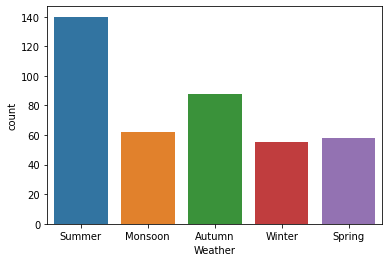

In [10]:
#since weather is categorical data, do a count plot of the weather
sns.countplot(x=data.Weather)

In [11]:
#another way to do this is
data.Weather.value_counts()

Summer     140
Autumn      88
Monsoon     62
Spring      58
Winter      55
Name: Weather, dtype: int64

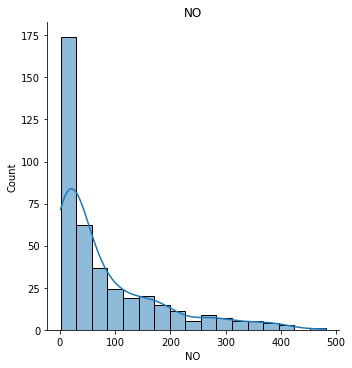

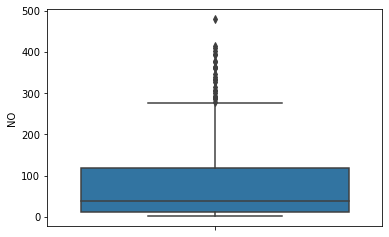

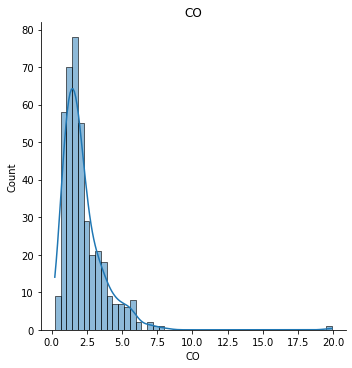

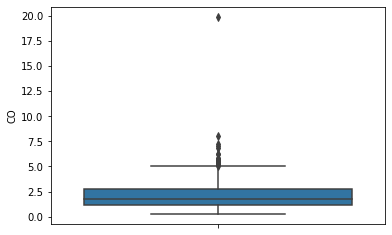

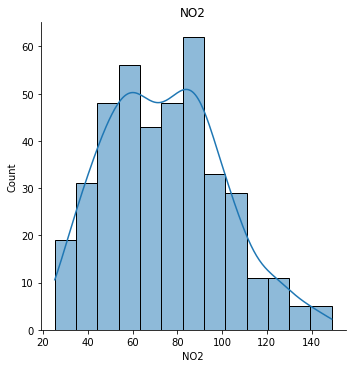

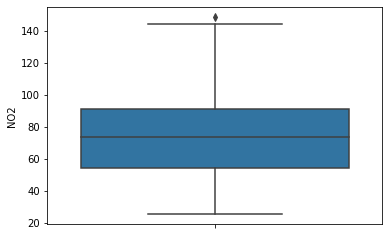

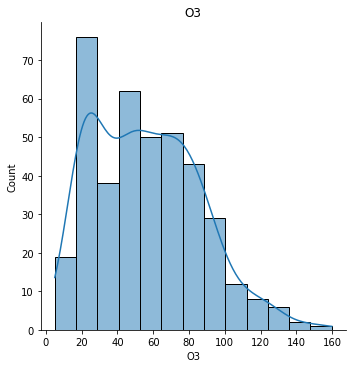

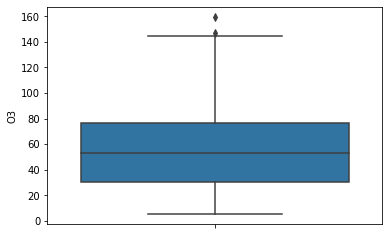

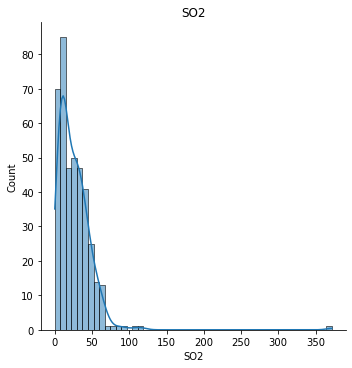

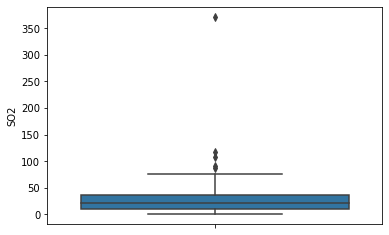

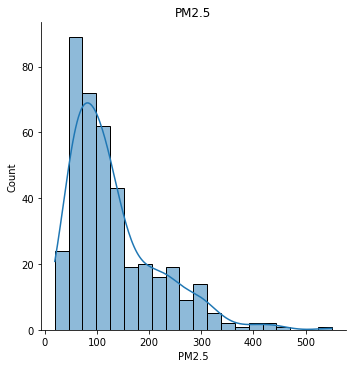

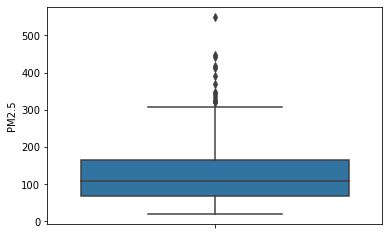

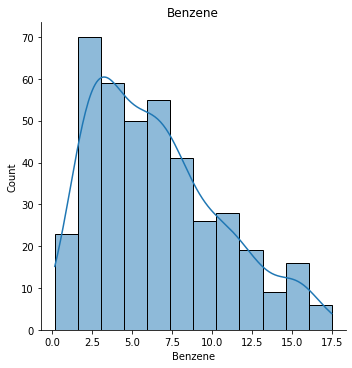

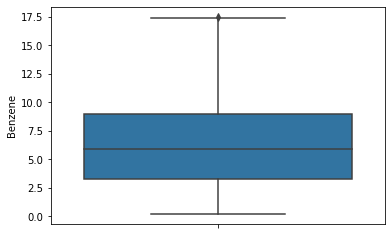

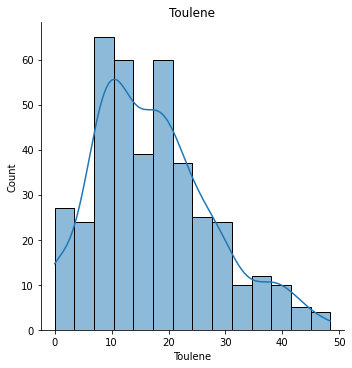

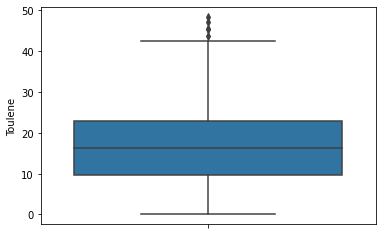

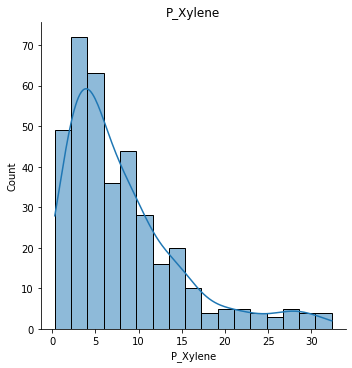

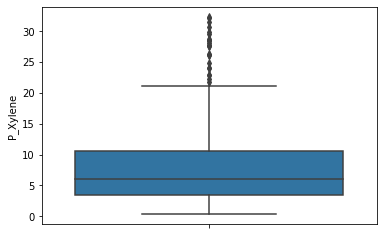

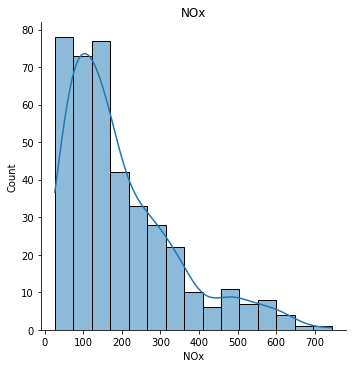

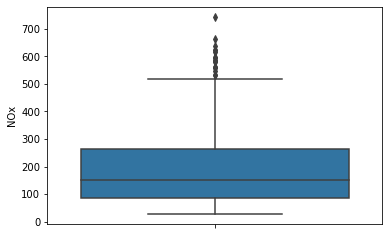

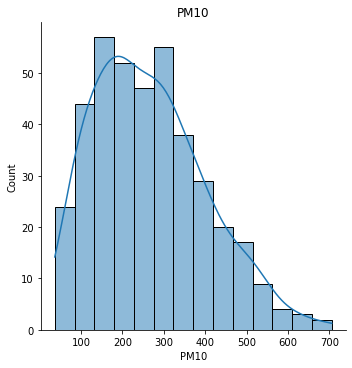

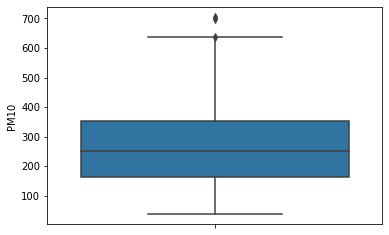

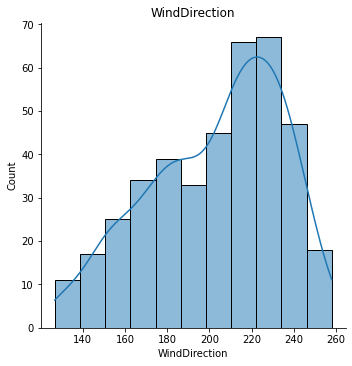

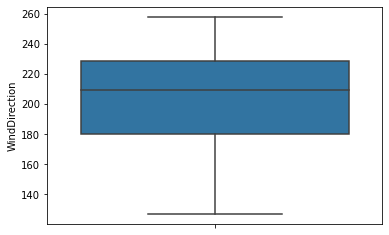

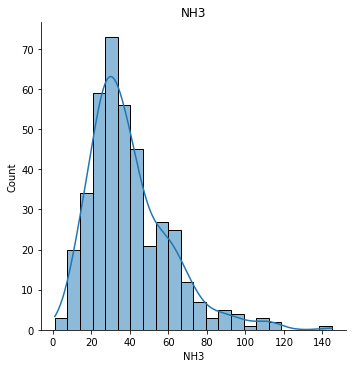

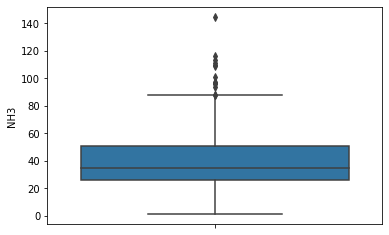

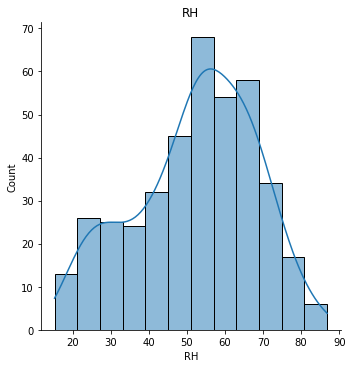

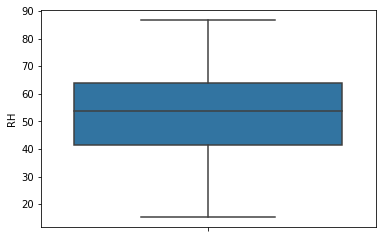

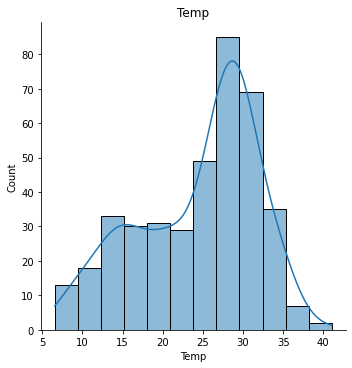

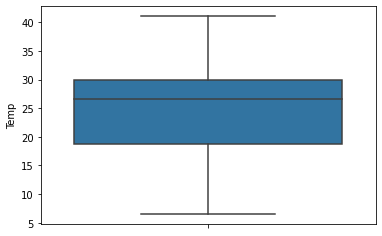

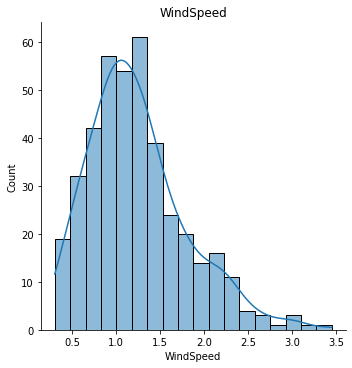

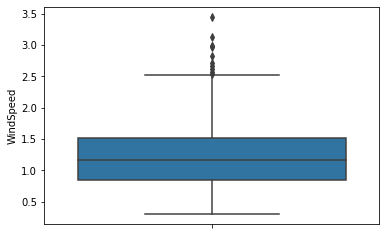

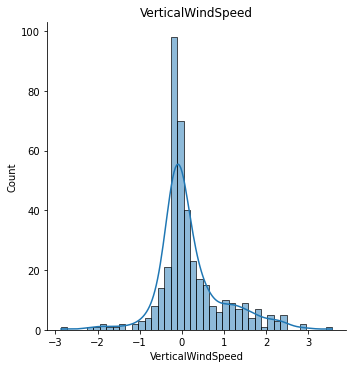

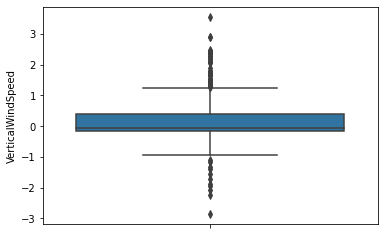

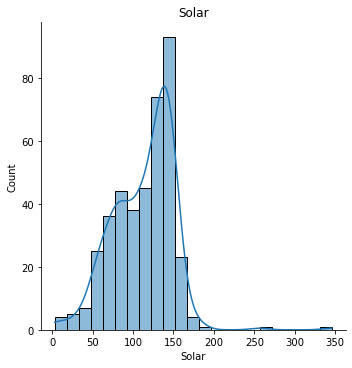

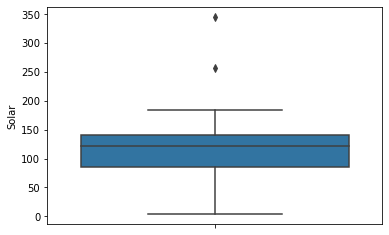

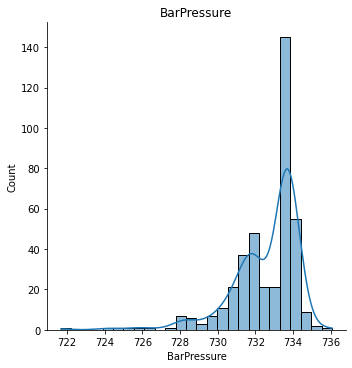

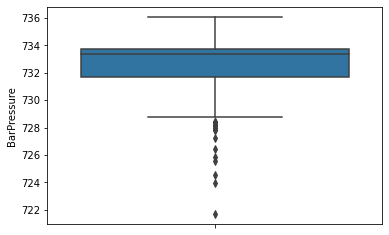

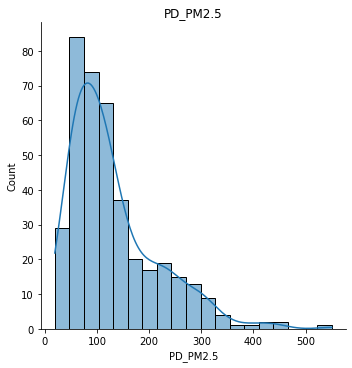

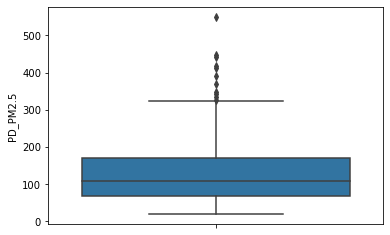

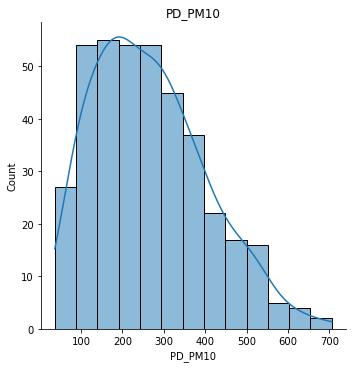

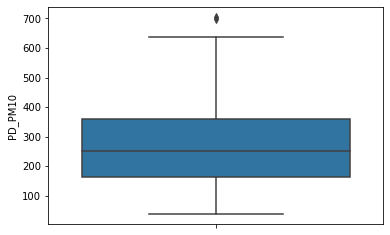

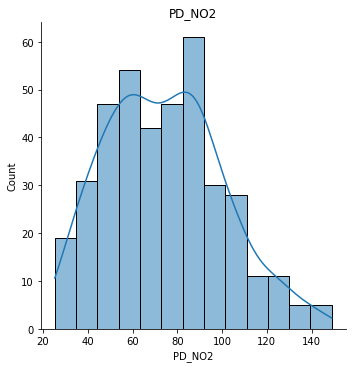

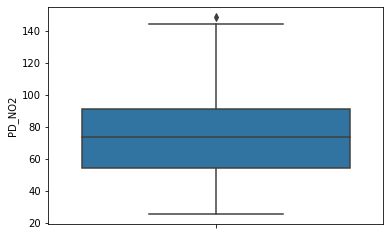

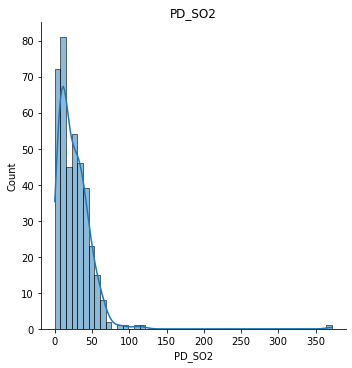

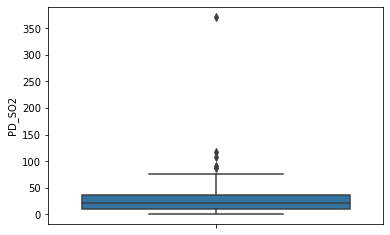

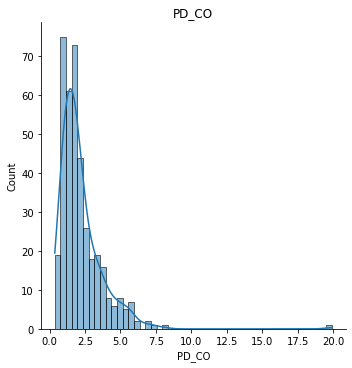

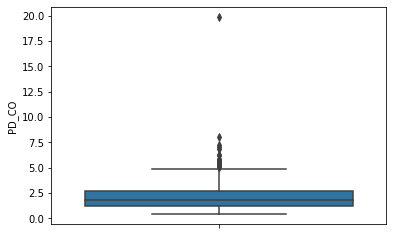

In [14]:
# do histogram and box plots on numerical data to understand its basic shape and if there are any outliers
for col in data.columns:
    if col == 'Weather':
        pass
    else:
        sns.displot(data[col], kde=True)
        plt.title(col)
        plt.show()
        sns.boxplot(y=data[col])
        plt.show()

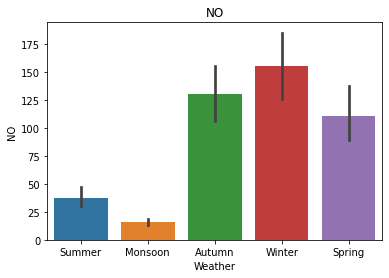

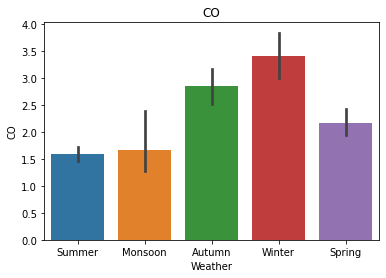

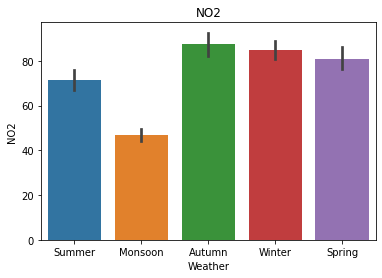

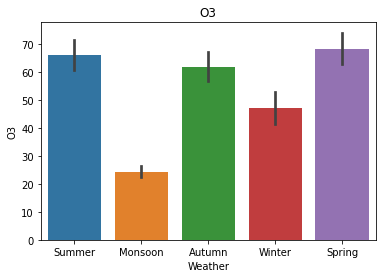

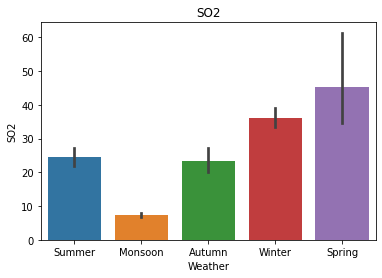

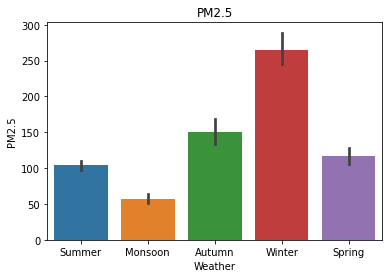

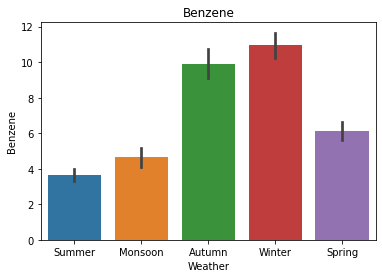

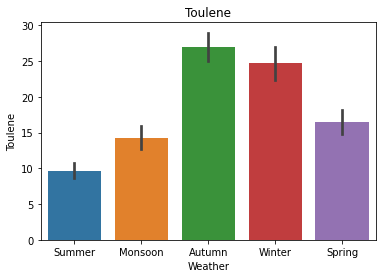

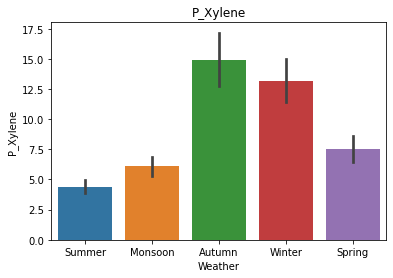

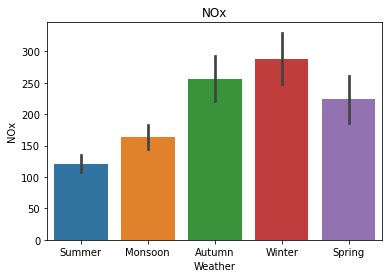

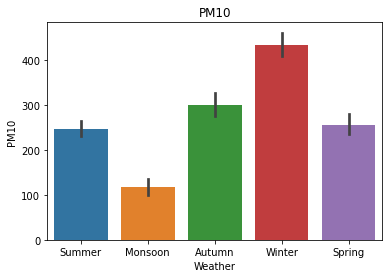

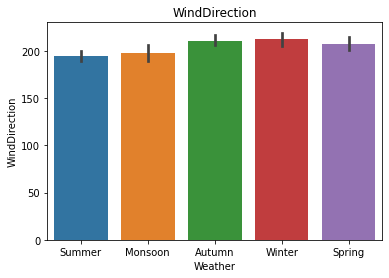

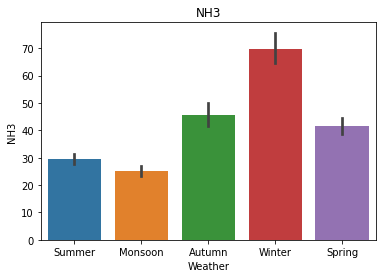

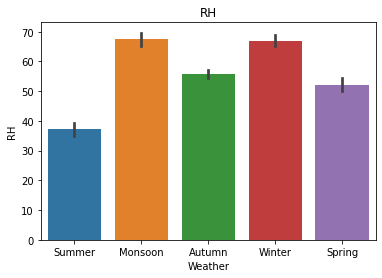

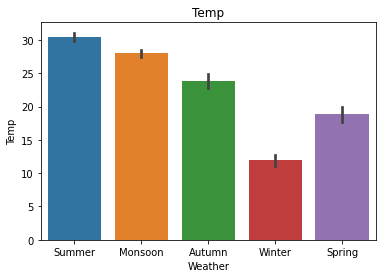

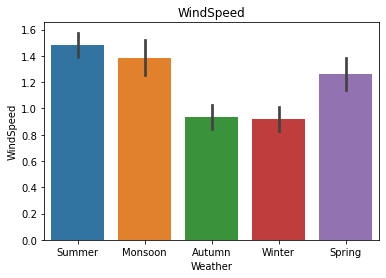

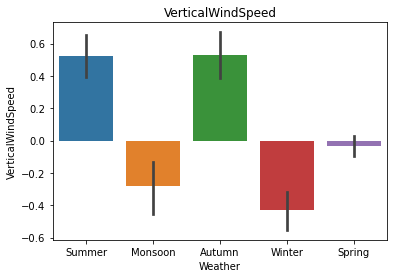

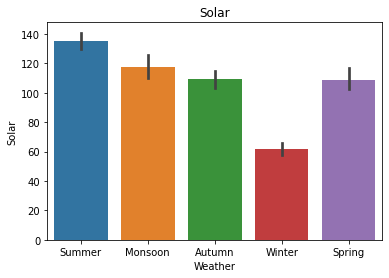

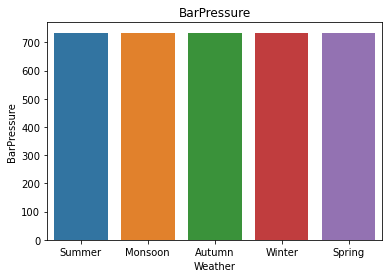

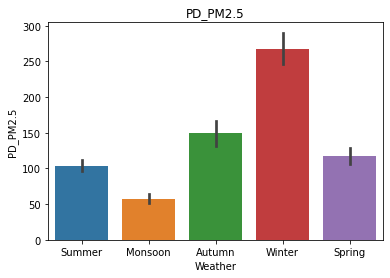

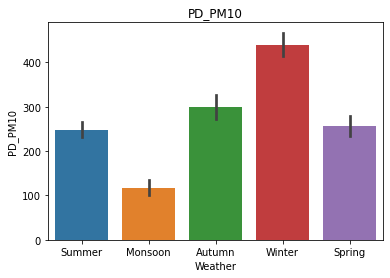

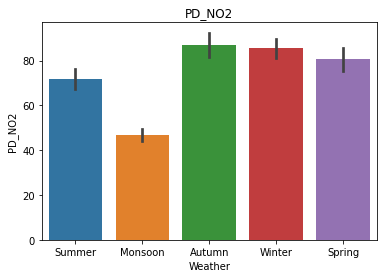

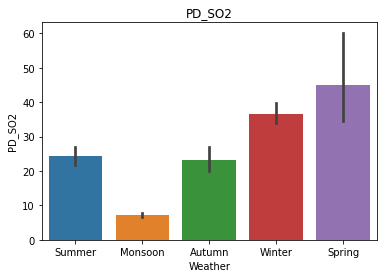

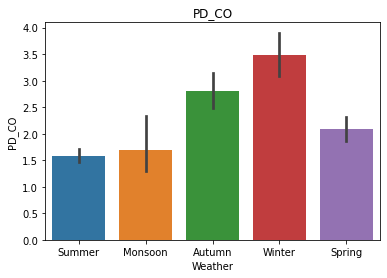

In [35]:
#now do bar plots for weather accross x axis and numerical data accross y axis to see if categorical data has any influence on numerical data
for col in data.columns:
    if col == 'Weather':
        pass
    else:
        sns.barplot(x=data.Weather,y=data[col])
        plt.title(col)
        plt.show()

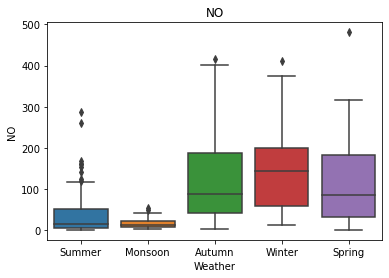

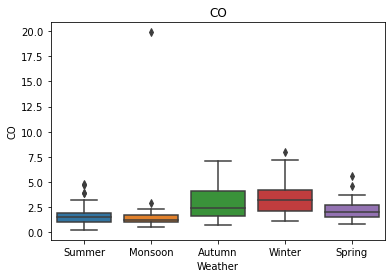

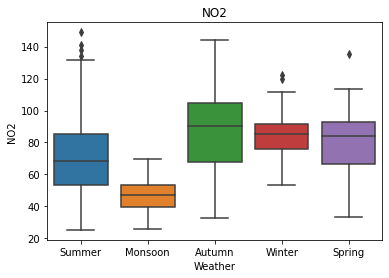

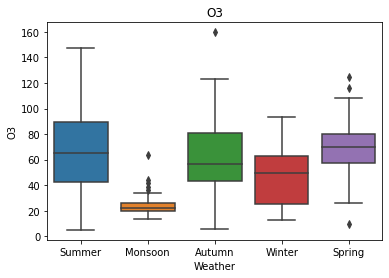

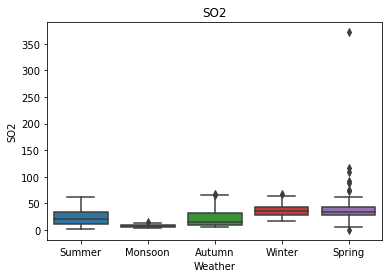

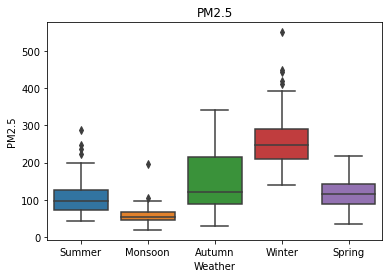

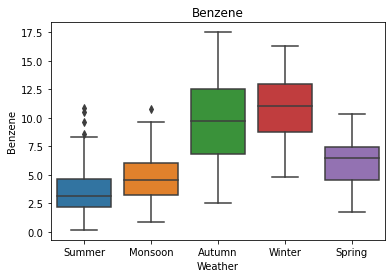

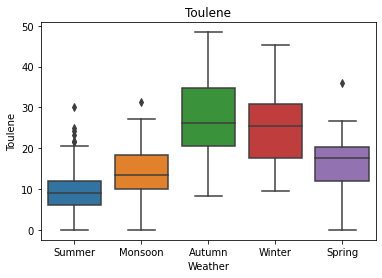

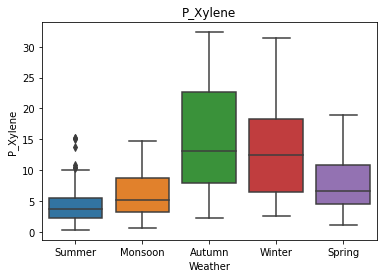

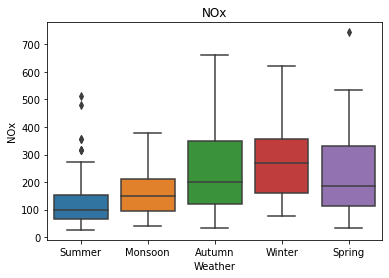

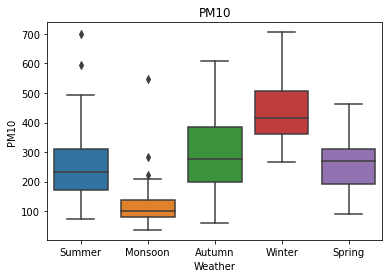

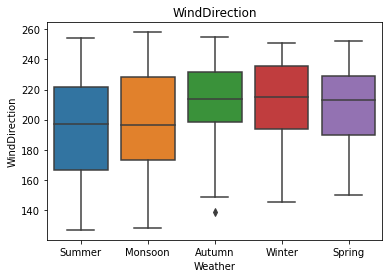

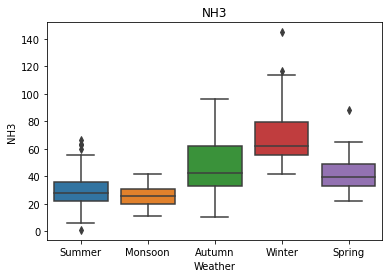

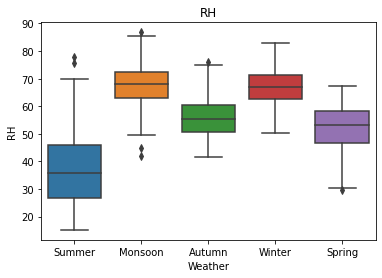

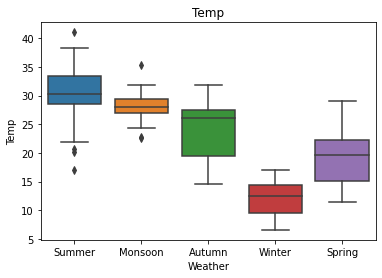

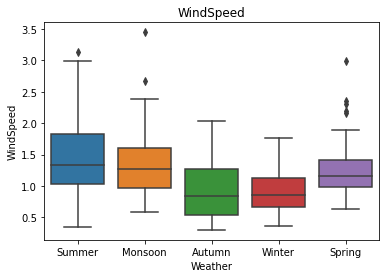

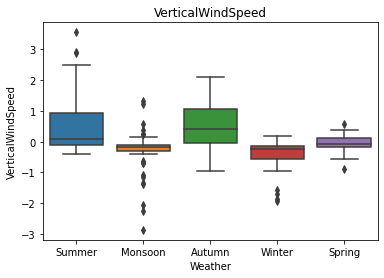

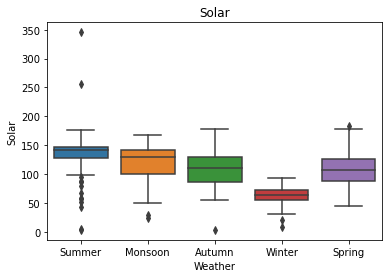

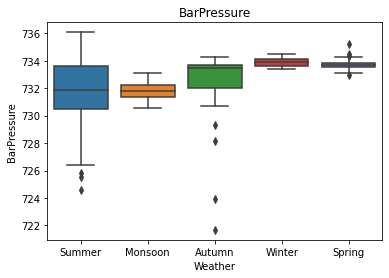

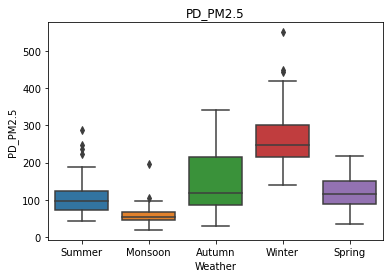

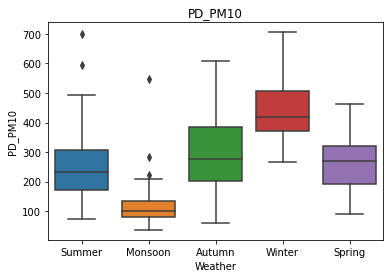

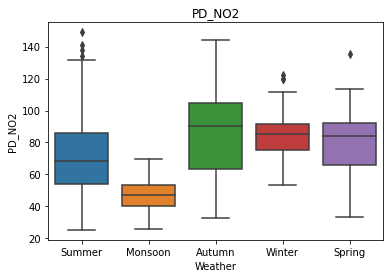

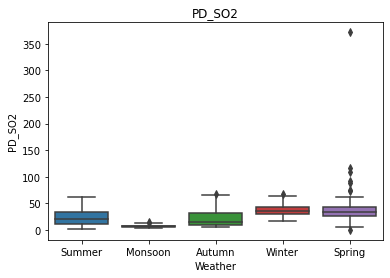

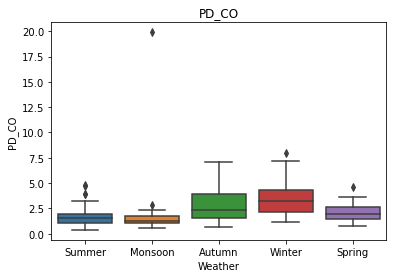

In [36]:
#now do the same but with box plot instead of bar plots
for col in data.columns:
    if col == 'Weather':
        pass
    else:
        sns.boxplot(x=data.Weather,y=data[col])
        plt.title(col)
        plt.show()

**Observations:**
- PD_CO, PD_SO2, NH3, PD_PM2.5, NOx, P_Xylene, and PM2.5 variables are highly right-skewed. It is evident from the boxplots that all these variables have outliers towards the right.

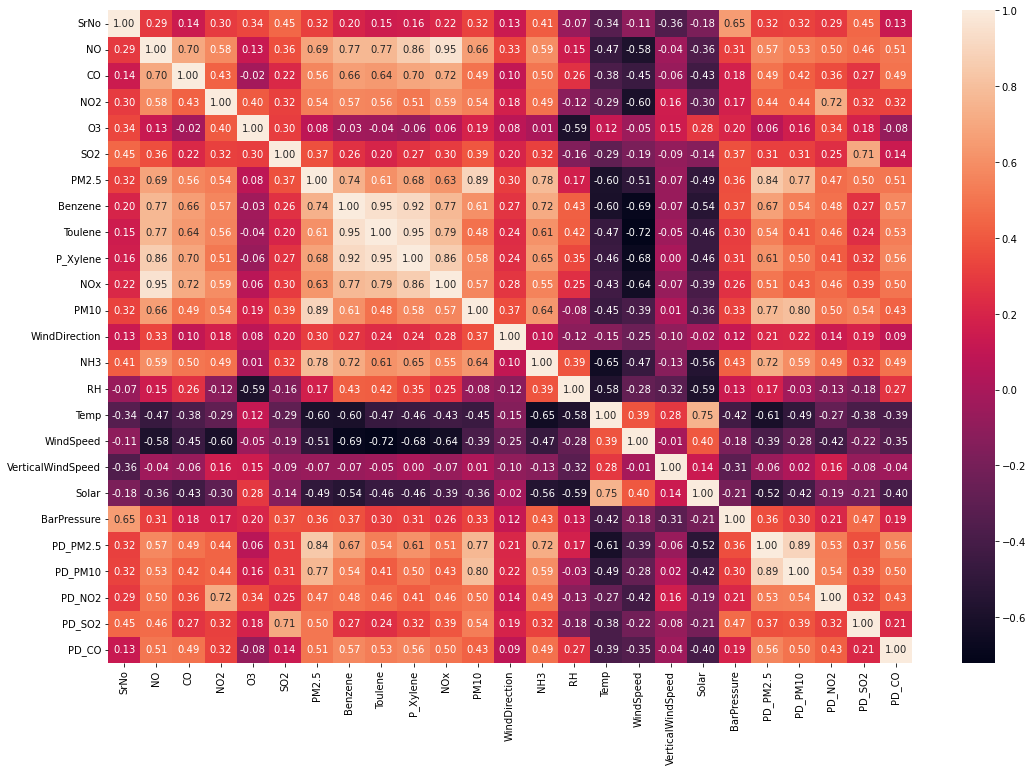

In [37]:
#lets do a correlation heatmap accross all numerical data
plt.figure(figsize = (18, 12))

sns.heatmap(data_air_pol.corr(), annot = True, fmt = '0.2f')

plt.show()

**Observations:**

- Positive correlation between the following:
    1. NO2 and PD_NO2
    2. PM2.5 and PD_PM2.5
    3. PM10 and PD_PM2.5 
    4. PD_PM10 and PD_PM2.5    
<br/>   
- Negative correlation between the following:
    1. Temp and NO2
    2. VerticalWindSpeed and PD_SO2
    3. VerticalWindSpeed and PD_PM2.5
    4. WindDirection and VerticalWindSpeed
    5. SO2 and WindSpeed   


### Step 3 - Data Preprocessing

In [15]:
# Imputing missing values with mode for the Weather column and with median for all other columns as majority of variables are skewed
for col in data.columns:
    
    if col == "Weather":
        data[col].fillna(value = data[col].mode()[0], inplace = True)
    
    else:
        data[col].fillna(value = data[col].median(), inplace = True)

In [16]:
# Creating dummy variables for Weather column
data = pd.get_dummies(data, drop_first = True)

In [17]:
data.head()

,NO,CO,NO2,O3,SO2,PM2.5,Benzene,Toulene,P_Xylene,NOx,...,BarPressure,PD_PM2.5,PD_PM10,PD_NO2,PD_SO2,PD_CO,Weather_Monsoon,Weather_Spring,Weather_Summer,Weather_Winter
0,7.22,1.77,47.94,51.07,16.88,48.99,2.53,9.65,3.00,52.97,...,732.25,108.24,250.105,73.52,21.605,1.775,0,0,1,0
1,6.99,0.22,45.27,19.26,16.71,60.20,3.19,11.10,2.67,51.31,...,734.05,48.99,82.850,47.94,16.880,1.770,0,0,1,0
2,7.60,0.50,59.86,94.29,13.11,46.93,2.29,8.61,3.43,65.53,...,728.08,108.24,250.105,73.52,21.605,1.775,0,0,1,0
3,7.57,0.77,63.56,66.91,16.19,112.95,3.92,10.76,4.66,68.83,...,730.47,46.93,171.360,59.86,13.110,0.500,0,0,1,0
4,8.34,0.48,61.99,69.48,20.28,104.87,5.19,15.95,7.66,67.40,...,730.62,112.95,232.220,63.56,16.190,0.770,0,0,1,0


#### **Scaling the data**

In [18]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [19]:
data_scaled

array([[-0.76268524, -0.27471889, -1.0281037 , ..., -0.41001944,
         1.37060987, -0.39754997],
       [-0.76505914, -1.24483113, -1.13172891, ..., -0.41001944,
         1.37060987, -0.39754997],
       [-0.75876315, -1.06958505, -0.56547731, ..., -0.41001944,
         1.37060987, -0.39754997],
       ...,
       [-0.82027806, -0.9882208 , -1.62074674, ..., -0.41001944,
         1.37060987, -0.39754997],
       [-0.48235889, -0.58765832, -0.50920145, ..., -0.41001944,
         1.37060987, -0.39754997],
       [-0.5988863 , -0.70657531, -0.65513058, ..., -0.41001944,
         1.37060987, -0.39754997]])

In [20]:
#create a datafram and set the columns to the same as the original dataset
data_scaled = pd.DataFrame(data_scaled, columns = data.columns)

In [21]:
data_scaled.head()

,NO,CO,NO2,O3,SO2,PM2.5,Benzene,Toulene,P_Xylene,NOx,...,BarPressure,PD_PM2.5,PD_PM10,PD_NO2,PD_SO2,PD_CO,Weather_Monsoon,Weather_Spring,Weather_Summer,Weather_Winter
0,-0.762685,-0.274719,-1.028104,-0.176087,-0.360903,-0.966206,-1.005290,-0.726103,-0.766391,-1.006218,...,-0.175488,-0.259436,-0.113049,-0.030312,-0.168884,-0.262123,-0.426401,-0.410019,1.37061,-0.39755
1,-0.765059,-1.244831,-1.131729,-1.256817,-0.367671,-0.832590,-0.839185,-0.586470,-0.817281,-1.018023,...,0.828051,-0.967381,-1.365729,-1.030531,-0.358008,-0.265288,-0.426401,-0.410019,1.37061,-0.39755
2,-0.758763,-1.069585,-0.565477,1.292291,-0.510985,-0.990760,-1.065691,-0.826253,-0.700079,-0.916904,...,-2.500352,-0.259436,-0.113049,-0.030312,-0.168884,-0.262123,-0.426401,-0.410019,1.37061,-0.39755
3,-0.759073,-0.900598,-0.421877,0.362069,-0.388372,-0.203844,-0.655463,-0.619211,-0.510398,-0.893437,...,-1.167876,-0.991995,-0.702821,-0.564440,-0.508908,-1.069106,-0.426401,-0.410019,1.37061,-0.39755
4,-0.751125,-1.082103,-0.482810,0.449383,-0.225551,-0.300152,-0.335838,-0.119422,-0.047760,-0.903606,...,-1.084248,-0.203159,-0.247001,-0.419764,-0.385627,-0.898215,-0.426401,-0.410019,1.37061,-0.39755


## **Principal Component Analysis**

In [24]:
# Defining the number of principal components to generate. You are picking the number of columns as n, which is 28.
n = data_scaled.shape[1]
print(n)
# Finding principal components for the data
pca1 = PCA(n_components = n, random_state = 1)
data_pca = pd.DataFrame(pca1.fit_transform(data_scaled))

# The percentage of variance explained by each principal component
exp_var1 = pca1.explained_variance_ratio_

28


In [55]:
data_pca

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-2.742064,0.090409,-0.544034,-0.639932,1.305489,1.049067,-0.965436,0.103459,0.051540,0.198931,...,0.675502,0.804767,-0.665327,0.583680,-0.496965,0.237807,-0.311625,0.022113,-0.256680,-0.016397
1,-2.518826,1.834496,-0.820265,-0.125443,1.226361,0.136618,-0.763263,-1.243801,-0.533671,0.864223,...,0.488313,1.215222,-0.411048,0.421006,-0.146722,0.095045,-0.074077,-0.198902,-0.279627,-0.056044
2,-3.234021,-1.678367,0.109291,-0.832131,-0.425673,-0.604315,0.621228,0.278716,1.541888,0.131122,...,0.802738,0.111171,0.242053,0.430897,-0.351020,0.200112,-0.122626,-0.160006,-0.106472,0.030652
3,-2.722372,-0.876209,0.114949,-0.334952,-0.926435,-1.151151,0.121267,-0.785277,0.602173,-0.051567,...,0.372883,0.380353,0.109244,0.607604,-0.328072,0.150243,-0.260876,0.126214,-0.057704,0.025010
4,-1.952577,-1.032156,0.308900,-0.634766,-0.561540,-0.982848,0.067600,-0.769568,0.042768,0.356044,...,0.623313,-0.002952,0.282050,0.437699,-0.152451,0.206255,-0.137898,-0.130241,-0.113247,0.011455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,-0.377477,-2.833380,-1.327138,-1.307556,-2.260970,-0.918250,-0.354822,0.298462,-0.452664,-0.731200,...,-0.272777,0.609752,0.268063,0.136613,0.547656,-0.631524,-0.298067,0.183220,-0.292562,0.134019
399,-1.613237,-2.343882,-2.457767,-1.958795,-2.468323,-0.127545,0.917422,1.306465,-0.475935,-0.187057,...,0.594204,0.025188,-0.652844,-0.277841,0.377907,-0.473787,-0.019883,-0.240223,0.163084,-0.022819
400,-3.872231,-1.990180,-2.550924,-0.897667,-0.366726,1.258623,-1.306530,1.251411,-0.912761,-1.663890,...,0.773632,0.278808,-0.790530,0.362298,0.026506,-0.182100,-0.650285,-0.060376,0.103009,-0.056261
401,-2.420606,0.912599,-1.106143,-0.130414,0.414722,0.241150,-0.850811,-1.268872,-0.386708,-0.215392,...,0.782070,0.310841,-1.065966,-0.236845,0.053271,-0.206459,-0.395384,0.074167,-0.152383,-0.041282


In [26]:
#check explained variance
pca1.explained_variance_ratio_

array([0.40157886, 0.12764382, 0.07673692, 0.06749461, 0.04392657,
       0.03559814, 0.03115307, 0.02781003, 0.02365943, 0.02158212,
       0.01841877, 0.01622558, 0.01499302, 0.01363074, 0.01281323,
       0.0118397 , 0.01011448, 0.00961036, 0.00878955, 0.00583886,
       0.00510724, 0.00430188, 0.00307071, 0.0025847 , 0.00247086,
       0.00167626, 0.00082498, 0.00050549])

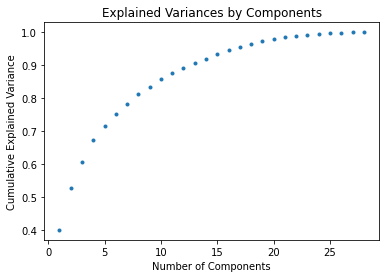

In [29]:
# Now lets plot this explaind variance ratio. We will take cumulative sum since each column is marginal increase for that PCA component

plt.plot(range(1, 29), pca1.explained_variance_ratio_.cumsum(),'.')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

As expected, Adding PCA components increases the amount of variance being captured. However, for each PCA component added, the variation being captured decreases so its is a downward sloping tragectory  

5 PCA components explain 70% of the variance

In [30]:
# Making a new dataframe with first 5 principal components as columns and original features as indices
cols = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']

pc1 = pd.DataFrame(np.round(pca1.components_.T[:, 0:5], 2), index = data_scaled.columns, columns = cols)
pc1

#each PCA is a LINEAR combination of features

,PC1,PC2,PC3,PC4,PC5
NO,0.25,-0.05,0.18,0.14,-0.13
CO,0.21,0.04,0.18,-0.00,-0.03
NO2,0.19,-0.22,0.18,0.06,0.24
O3,0.02,-0.38,-0.02,0.18,0.08
SO2,0.12,-0.19,-0.20,0.28,-0.11
PM2.5,0.26,-0.06,-0.10,-0.18,-0.14
Benzene,0.27,0.09,0.15,0.01,-0.01
Toulene,0.25,0.10,0.27,0.08,0.01
P_Xylene,0.25,0.07,0.22,0.03,-0.10
NOx,0.24,0.01,0.26,0.15,-0.12


## **t-SNE**

Let's try to **visualize the data for different perplexity values**. Perplexity is tunable parameter which desribes how to balance the global and local aspects of a data. It has a complex affect on dataset and is usually in the 10 to 50 range

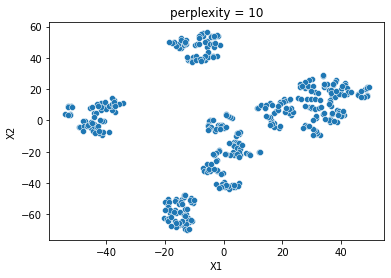

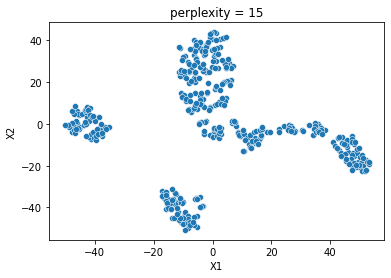

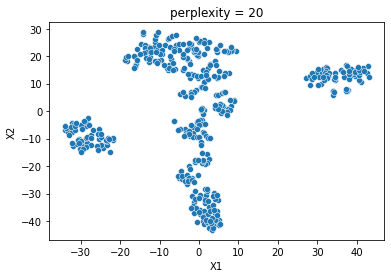

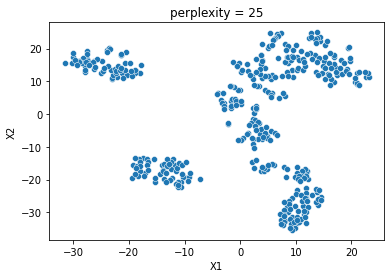

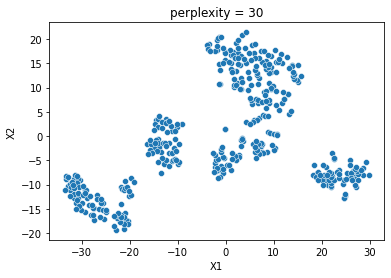

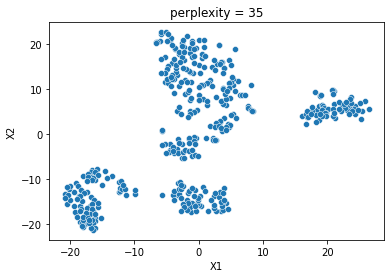

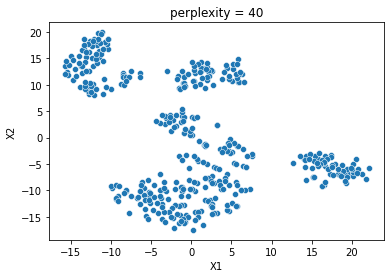

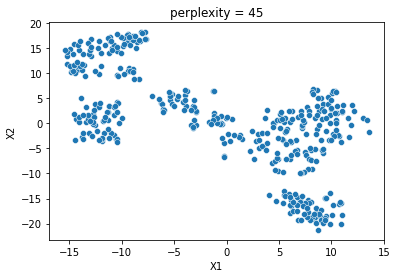

In [34]:
for i in range(10, 50, 5):
    tsne = TSNE(n_components = 2, random_state = 1, perplexity = i)
    
    data_air_pol_tsne = tsne.fit_transform(data_scaled)
    
    data_air_pol_tsne = pd.DataFrame(data_air_pol_tsne)
    
    data_air_pol_tsne.columns = ['X1', 'X2']
    
    sns.scatterplot(x = 'X1', y = 'X2', data = data_air_pol_tsne)
    
    plt.title("perplexity = {}".format(i))
    
    plt.show()

**Observations:**

- We observe that some perplexity values like 35 and 45 can capture the underlying patterns in the data better than other values.
- Let's visualize again with **perplexity equal to 35 as 4 clear groups are distant from each other, i.e., well separated.**

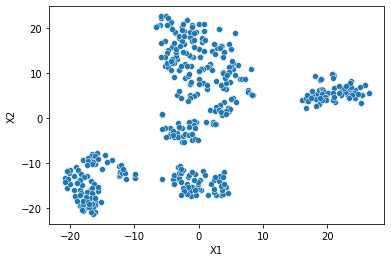

In [35]:
# Fitting t-SNE with number of components equal to 2
tsne = TSNE(n_components = 2, random_state = 1, perplexity = 35)

data_air_pol_tsne = tsne.fit_transform(data_scaled)

# Converting the embeddings to a dataframe
data_air_pol_tsne = pd.DataFrame(data_air_pol_tsne, columns = ["X1", "X2"])

# Scatter plot for two components

sns.scatterplot(x = 'X1', y = 'X2', data = data_air_pol_tsne)

plt.show()

**Observations:**

- We can clearly see **4 groups in the data**.
- Let's **label these 4 groups** using the values of the X1 and X2 axes.

#### Conclusion

- Now that the data has been grouped, it can be further analyzed
- Data can be assigned to groups 1 through 4, and further data analysis can be done on the data to see if what the underlying groups represent
- This can be done in the form of box plots, bar graphs, where the data has been split into 4 different groups
- Essentially, 28 columns were 'converted' to 4 groups, with similar data being grouped together, thereby reducing its dimensionality